In [8]:
%matplotlib inline

In [9]:
import supervisely_lib as sly
import os
import requests
import numpy as np
import matplotlib.pyplot as plt

In [2]:
address = os.environ['SERVER_ADDRESS']
token = os.environ['API_TOKEN']

In [3]:
print("Server address: ", address)
print("Your API token: ", token)

Server address:  http://192.168.1.69:5555
Your API token:  OfaV5z24gEQ7ikv2DiVdYu1CXZhMavU7POtJw2iDtQtvGUux31DUyWTXW6mZ0wd3IRuXTNtMFS9pCggewQWRcqSTUi4EJXzly8kH7MJL1hm3uZeM2MCn5HaoEYwXejKT


In [4]:
api = sly.Api(address, token)

In [5]:
# get some context - team and workspace
team = api.team.get_list()[0]
workspace = api.workspace.get_list(team.id)[0]
print("Current context: Team {!r}, Workspace {!r}".format(team.name, workspace.name))

Current context: Team 'max', Workspace 'my_super_workspace_002'


In [7]:
project_name = 'project_test'
if api.project.exists(workspace.id, project_name):
    project_name = api.project.get_free_name(workspace.id, project_name)
task_id = api.project.clone_from_explore('Supervisely/Demo/lemons_annotated', workspace.id, project_name)
api.task.wait(task_id, api.task.Status.FINISHED)
project = api.project.get_info_by_name(workspace.id, project_name)
print('Project {!r} has been sucessfully created: '.format(project.name))
print(project)
print('Number of images in project: ', api.project.get_images_count(project.id))

Project 'project_test_008' has been sucessfully created: 
ProjectInfo(id=771, name='project_test_008', description='', size='861069', readme='', workspace_id=9, created_at='2019-03-13T15:50:15.460Z', updated_at='2019-03-13T15:50:15.460Z')
Number of images in project:  6


Image Shape: (856, 1283, 3)


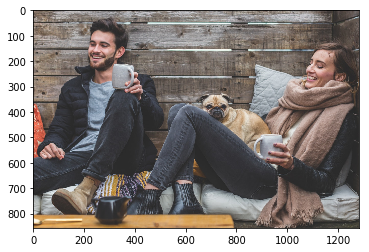

In [10]:
img_url = 'http://192.168.1.69:5555/h5un6l2bnaz1vj8a9qgms4-public/assets/projects/images/V/N/iQ/wOqv967pfMoMcJQ5Zo8j666wkABscaSR0f1N8lfKgc1eG98GVI1qxTv0UPiKsbsTFuCSEVhJpU6tCaYkUD0eJo69xzy3dwCRnvHaAwKFwZdr0jwfYrqQn0uf6PeN.png'
response = requests.get(img_url)
img = sly.image.read_bytes(response.content)
#visualize image here
print("Image Shape: {}".format(img.shape))
imgplot = plt.imshow(img)

In [11]:
new_dataset = api.dataset.create(project.id, 'new_dataset')
img_hash = api.image.upload_np(img)
img_info = api.image.add(new_dataset.id, 'super_image', img_hash)
print('image has been sucessfully added: id={}, name={}'.format(img_info.id, img_info.name))
print('Number of images in project: ', api.project.get_images_count(project.id))

image has been sucessfully added: id=81865, name=super_image
Number of images in project:  7
